# **Phân loại sắc thái bình luận khách hàng** (Vietnamese sentiment analysis)

## Tóm tắt phương thức thực hiện bài toán

1. Cuộc thi và dữ liệu
- Cuộc thi AIVIVN: https://www.aivivn.com/contests/1
- Dữ liệu:  file_train: train.crash, file test: test.crash, sample_submission.csv. Câu bình luận có độ dài bất kỳ được gán nhãn 0 hoặc 1, trong đó 1: bình luận tiêu cực, 0: bình luận tích cực. Tập dữ liệu huấn luyện và tập dữ liệu kiểm tra train.crash: 16086 bình luận, test.crash: 10980 bình luận.
- Nhiệm vụ: Xác định bình luận mang ý nghĩa tiêu cực hay tích cực.



2. Tiền xử lý dữ liệu
- Chuẩn hóa các ký tự bị kéo dài. VD: chiếc áo này đẹp quaaa -> chiếc áo này đẹp quá,...
- Chuẩn hóa một số sentiment word. VD "okie"-> "ok", "k" ->"không", "tot"->"tốt",... 
- Đưa các icon về tích cực (positive) hay tiêu cực (nagative). VD: ;) -> positive, :(( ->nagative. 
- Loại bỏ các dấu câu và các ký tự nhiễu.
- Mở rộng data bằng cách thêm các câu bình luận không dấu. Thực tế, nhiều review cũng không có dấu.
- Mở rộng train data bằng cách thêm vào các mẫu mới là lấy từ chính 2 từ điển, từ điển positive (các từ ngữ mang yếu tố tích cực) và từ điển nagative (các từ ngữ có ý nghĩa tiêu cực).

3. Lựa chọn và xây dựng mô hình
- Các mô hình machine-learning cơ bản dùng để phân lớp dữ liệu: SVM, Navie Bayes, Logistic_Regression, Decision_Tree.
- Các mô hình deep-learning: Mạng neuron tích chập, mạng neuron hồi tiếp, mạng LSTM.
- Lựa chọn: Mạng neuron hồi tiếp hai chiều với kiến trúc là LSTM

4. Quy trình thực hiện
- Bước 1. Lấy được các trường dữ liệu: id, label, review. Tiền xử lý dữ liệu.

- Bước 2. Sử dụng các công cụ để Word Embedding các từ.

- Bước 3. Chuẩn hóa độ dài các câu trong dữ liệu train. Chia tập dữ liệu theo tỷ lệ 7/3.

- Bước 4. Đưa vào các mô hình. Luyện mô hình.

- Bước 5. Predict với dữ liệu validation_data. Predict với dữ liệu test.

- Bước 6. Đánh giá độ chính xác và kết luận.

## Cài đặt pytorch và google drive

Cài đăt pytorch

In [ ]:
pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1MB 1.3MB/s eta 0:14:35tcmalloc: large alloc 1147494400 bytes == 0x55c22d9cc000 @  0x7f6a92537615 0x55c1f4bd1cdc 0x55c1f4cb152a 0x55c1f4bd4afd 0x55c1f4cc5fed 0x55c1f4c48988 0x55c1f4c434ae 0x55c1f4bd63ea 0x55c1f4c487f0 0x55c1f4c434ae 0x55c1f4bd63ea 0x55c1f4c4532a 0x55c1f4cc6e36 0x55c1f4c44853 0x55c1f4cc6e36 0x55c1f4c44853 0x55c1f4cc6e36 0x55c1f4c44853 0x55c1f4cc6e36 0x55c1f4d493e1 0x55c1f4ca96a9 0x55c1f4c14cc4 0x55c1f4bd5559 0x55c1f4c494f8 0x55c1f4bd630a 0x55c1f4c443b5 0x55c1f4c437ad 0x55c1f4bd63ea 0x55c1f4c443b5 0x55c1f4bd630a 0x55c1f4c443b5
     |█████████████████               | 1055.7MB 1.2MB/s eta 0:12:31tcmalloc: large alloc 1434370048 bytes == 0x55c272022000 @  0x7f6a92537615 0x55c1f4bd1cdc 0x55c1f4cb152a 0x55c1f4bd4afd 0x55c1f4cc5fed 0x55c1f4c48988 0x55c1f4c434ae 0x55c1f4bd63ea 0x55c1f4c487f0 0x55c1f4c434ae 0x55c1f4bd63ea 0x55c1f4c4532a 0x55c1f4cc6e36 0x55c1f4c44853 0

Kết nối google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Cài đặt thư viên

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

## Hiển thị và tiền xử lý dữ liệu

In [3]:
pip install pyvi

     |████████████████████████████████| 8.5MB 15.1MB/s 
     |████████████████████████████████| 747kB 42.8MB/s 


In [4]:
import pandas as pd
from pyvi import ViTokenizer
import re
import string
import codecs

Xây dựng các từ điển tích cực, từ điển tiêu cực

In [5]:
path = "/content/gdrive/MyDrive/sentiment_vietnamese/sentiment_dicts"
path_nag = path + '/nag.txt'
path_pos = path + '/pos.txt'
path_not = path + '/not.txt'
VN_CHARS_LOWER = u'ạảãàáâậầấẩẫăắằặẳẵóòọõỏôộổỗồốơờớợởỡéèẻẹẽêếềệểễúùụủũưựữửừứíìịỉĩýỳỷỵỹđð'
VN_CHARS_UPPER = u'ẠẢÃÀÁÂẬẦẤẨẪĂẮẰẶẲẴÓÒỌÕỎÔỘỔỖỒỐƠỜỚỢỞỠÉÈẺẸẼÊẾỀỆỂỄÚÙỤỦŨƯỰỮỬỪỨÍÌỊỈĨÝỲỶỴỸÐĐ'
VN_CHARS = VN_CHARS_LOWER + VN_CHARS_UPPER

In [6]:
def diction_nag_pos_not():
    with codecs.open(path_nag, 'r', encoding='UTF-8') as f:
        nag = f.readlines()
    nag_list = [n.replace('\n', '') for n in nag]

    with codecs.open(path_pos, 'r', encoding='UTF-8') as f:
        pos = f.readlines()
    pos_list = [n.replace('\n', '') for n in pos]
    with codecs.open(path_not, 'r', encoding='UTF-8') as f:
        not_ = f.readlines()
    not_list = [n.replace('\n', '') for n in not_]
    return nag_list, pos_list, not_list

In [7]:
nag_list, pos_list, not_list = diction_nag_pos_not()

In [8]:
print(nag_list[0:5])
print(pos_list[0:5])
print(not_list) # Tập các từ phủ định

['bất lợi', 'chán', 'chật hẹchật', 'chật', 'tức giận']
['ưng ý', 'ưng', 'kỹ', 'được', 'ô kê']
['không', 'vô', 'chẳng', 'đếch', 'chưa', 'đéo', 'kém', 'nỏ', 'not']


Hàm bỏ dấu cho text

In [9]:
def no_marks(s):
    __INTAB = [ch for ch in VN_CHARS]
    __OUTTAB = "a" * 17 + "o" * 17 + "e" * 11 + "u" * 11 + "i" * 5 + "y" * 5 + "d" * 2
    __OUTTAB += "A" * 17 + "O" * 17 + "E" * 11 + "U" * 11 + "I" * 5 + "Y" * 5 + "D" * 2
    __r = re.compile("|".join(__INTAB))
    __replaces_dict = dict(zip(__INTAB, __OUTTAB))
    result = __r.sub(lambda m: __replaces_dict[m.group(0)], s)
    return result

In [10]:
s = "sản phẩm này rất đẹp"
print(no_marks(s))

san pham nay rat dep


### Hàm chuẩn hoá: 
- loại bỏ các ký tự kéo dài
- chuyển text thành chữ thường
- thêm feauture cho các sentiment work: "Áo này đẹp" chuyển thành "Áo này đẹp positive".  
- loại bỏ chấm câu.
- chuẩn hoá các từ tiếng Anh, các icon, các từ viết tắt.

In [11]:
def normalize_text(text):
    # Remove các ký tự kéo dài: vd: đẹppppppp
    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE)

    # Chuyển thành chữ thường
    text = text.lower()

    # Chuẩn hóa tiếng Việt, xử lý emoj, chuẩn hóa tiếng Anh, thuật ngữ
    replace_list = {
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé', 'ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ', 'ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố', 'ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề', 'ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ', 'aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ', 'ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        # Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
        "👹": "nagative", "👻": "positive", "💃": "positive", '🤙': ' positive ', '👍': ' positive ',
        "💄": "positive", "💎": "positive", "💩": "positive", "😕": "nagative", "😱": "nagative", "😸": "positive",
        "😾": "nagative", "🚫": "nagative", "🤬": "nagative", "🧚": "positive", "🧡": "positive", '🐶': ' positive ',
        '👎': ' nagative ', '😣': ' nagative ', '✨': ' positive ', '❣': ' positive ', '☀': ' positive ',
        '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ',
        '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' nagative ', '😢': ' nagative ',
        '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' nagative ', '😊': ' positive ',
        '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' nagative ', '😭': ' nagative ',
        '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
        '^^': ' positive ', '😨': ' nagative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
        '😖': ' nagative ', '😀': ' positive ', ':((': ' nagative ', '😡': ' nagative ', '😠': ' nagative ',
        '😒': ' nagative ', '🙂': ' positive ', '😏': ' nagative ', '😝': ' positive ', '😄': ' positive ',
        '😙': ' positive ', '😤': ' nagative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
        '✌': ' positive ', '💕': ' positive ', '😞': ' nagative ', '😓': ' nagative ', '️🆗️': ' positive ',
        '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=))': '  positive ', '😋': ' positive ',
        '💓': ' positive ', '😐': ' nagative ', ':3': ' positive ', '😫': ' nagative ', '😥': ' nagative ',
        '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
        '😗': ' positive ', '🤔': ' nagative ', '😑': ' nagative ', '🔥': ' nagative ', '🙏': ' nagative ',
        '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ',
        '😚': ' positive ', '❌': ' nagative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
        '🌝': ' positive ', '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ',
        '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
        '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ',
        '💰': ' positive ', '😇': ' positive ', '😛': ' positive ', '😜': ' positive ',
        '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ', '☹': ' nagative ', '💀': ' nagative ',
        '😔': ' nagative ', '😧': ' nagative ', '😩': ' nagative ', '😰': ' nagative ', '😳': ' nagative ',
        '😵': ' nagative ', '😶': ' nagative ', '🙁': ' nagative ',
        # Chuẩn hóa 1 số sentiment words/English words
        ':))': '  positive ', ':)': ' positive ', 'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ': ' ok ', ' okay': ' ok ', 'okê': ' ok ',
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ',
        'kg ': u' không ', 'not': u' không ', u' kg ': u' không ', '"k ': u' không ', ' kh ': u' không ',
        'kô': u' không ', 'hok': u' không ', ' kp ': u' không phải ', u' kô ': u' không ', '"ko ': u' không ',
        u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
        'he he': ' positive ', 'hehe': ' positive ', 'hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
        ' lol ': ' nagative ', ' cc ': ' nagative ', 'cute': u' dễ thương ', 'huhu': ' nagative ', ' vs ': u' với ',
        'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
        'đc': u' được ', 'authentic': u' chuẩn chính hãng ', u' aut ': u' chuẩn chính hãng ',
        u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ', 'god': u' tốt ', 'wel done': ' tốt ',
        'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ', 'gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt',
        'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng', 'chat': ' chất ', 'excelent': 'hoàn hảo',
        'bad': 'tệ', 'fresh': ' tươi ', 'sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ', 'quickly': u' nhanh ', 'quick': u' nhanh ',
        'fast': u' nhanh ', 'delivery': u' giao hàng ', u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',
        u' order ': u' đặt hàng ',
        'chất lg': u' chất lượng ', u' sd ': u' sử dụng ', u' dt ': u' điện thoại ', u' nt ': u' nhắn tin ',
        u' tl ': u' trả lời ', u' sài ': u' xài ', u'bjo': u' bao giờ ',
        'thik': u' thích ', u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',
        u'quả ng ': u' quảng  ',
        'dep': u' đẹp ', u' xau ': u' xấu ', 'delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
        'iu': u' yêu ', 'fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ',
        ' por ': u' tệ ', ' poor ': u' tệ ', 'ib': u' nhắn tin ', 'rep': u' trả lời ', u'fback': ' feedback ',
        'fedback': ' feedback ',
        # dưới 3* quy về 1*, trên 3* quy về 5*
        '6 sao': ' 5star ', '6 star': ' 5star ', '5star': ' 5star ', '5 sao': ' 5star ', '5sao': ' 5star ',
        'starstarstarstarstar': ' 5star ', '1 sao': ' 1star ', '1sao': ' 1star ', '2 sao': ' 1star ', '2sao': ' 1star ',
        '2 starstar': ' 1star ', '1star': ' 1star ', '0 sao': ' 1star ', '0star': ' 1star ', }

    for k, v in replace_list.items():
        text = text.replace(k, v)

    # chuyen punctuation thành space
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)

    text = ViTokenizer.tokenize(text)
    texts = text.split()
    len_text = len(texts)
    nag_list, pos_list, not_list = diction_nag_pos_not()
    texts = [t.replace('_', ' ') for t in texts]
    for i in range(len_text):
        cp_text = texts[i]
        if cp_text in not_list:  # Xử lý vấn đề phủ định (VD: áo này chẳng đẹp--> áo này notpos)
            numb_word = 2 if len_text - i - 1 >= 4 else len_text - i - 1

            for j in range(numb_word):
                if texts[i + j + 1] in pos_list:
                    texts[i] = 'notpos'
                    texts[i + j + 1] = ''

                if texts[i + j + 1] in nag_list:
                    texts[i] = 'notnag'
                    texts[i + j + 1] = ''
        else:  # Thêm feature cho những sentiment words (áo này đẹp--> áo này đẹp positive)
            if cp_text in pos_list:
                texts.append('positive')
            elif cp_text in nag_list:
                texts.append('nagative')

    text = u' '.join(texts)

    # remove nốt những ký tự thừa thãi
    text = text.replace(u'"', u' ')
    text = text.replace(u'️', u'')
    text = text.replace('🏻', '')
    return text

### Hiển thị và phân tích dữ liệu

In [12]:
class DataSource(object):
    def _load_raw_data(self, filename, is_train=True):
        a = []
        b = []
        regex = 'train_'
        if not is_train:
            regex = 'test_'
        with open(filename, 'r', encoding='utf8') as file:
            for line in file:
                if regex in line:
                    b.append(a)
                    a = [line]
                elif line != '\n':
                    a.append(line)
        b.append(a)
        return b[1:]

    def _create_row(self, sample, is_train=True):
        d = {}
        d['id'] = sample[0].replace('\n', '')
        review = ""
        if is_train:
            for clause in sample[1:-1]:
                review += clause.replace('\n', '').strip()
            d['label'] = int(sample[-1].replace('\n', ''))
        else:
            for clause in sample[1:]:
                review += clause.replace('\n', '').strip()
        d['review'] = review
        return d

    def load_data(self, filename, is_train=True):

        raw_data = self._load_raw_data(filename, is_train)
        lst = []

        for row in raw_data:
            lst.append(self._create_row(row, is_train))

        return lst

    def transform_to_dataset(self, x_set, y_set):
        X, y = [], []
        for document, topic in zip(list(x_set), list(y_set)):
            document = normalize_text(document)
            X.append(document.strip())
            y.append(topic)
            # Augmentation bằng cách remove dấu tiếng Việt
            X.append(no_marks(document))
            y.append(topic)
        return X, y

In [13]:
def return_data():
    ds = DataSource()
    train_data = pd.DataFrame(ds.load_data("/content/gdrive/MyDrive/sentiment_vietnamese/train.crash"))
    new_data = []
    '''
    # Thêm mẫu bằng cách lấy trong từ điển Sentiment (nag/pos)
    nag_list, pos_list, not_list = diction_nag_pos_not()
    for index, row in enumerate(pos_list):
        new_data.append(['pos' + str(index), '0', row])
    for index, row in enumerate(nag_list):
        new_data.append(['nag' + str(index), '1', row])
    '''
    new_data = pd.DataFrame(new_data, columns=list(['id', 'label', 'review']))
    train_data = train_data.append(new_data, ignore_index=True)
    test_data = pd.DataFrame(ds.load_data('/content/gdrive/MyDrive/sentiment_vietnamese/test.crash', is_train=False))
    return train_data, test_data

In [14]:
train_data, test_data = return_data()

Dữ liệu huấn luyện

In [15]:
train_data

,id,label,review
0,train_000000,0,"""Dung dc sp tot cam onshop Đóng gói sản phẩm r..."
1,train_000001,0,""" Chất lượng sản phẩm tuyệt vời . Son mịn nhưn..."
2,train_000002,0,""" Chất lượng sản phẩm tuyệt vời nhưng k có hộp..."
3,train_000003,1,""":(( Mình hơi thất vọng 1 chút vì mình đã kỳ v..."
4,train_000004,1,"""Lần trước mình mua áo gió màu hồng rất ok mà ..."
...,...,...,...
16082,train_016082,1,"""Chẳng biết là Shop có biết đọc hay không mua ..."
16083,train_016083,1,"""Cuốn này mỏng. Đọc một buổi sáng là hết. Thú ..."
16084,train_016084,0,"""Mang êm chân. Đẹp """
16085,train_016085,1,"""Tôi đã nhận đc hàng.Sau đây là vài lời muốn n..."


Dữ liệu kiểm tra

In [16]:
test_data

,id,review
0,test_000000,"""Chưa dùng thử nên chưa biết"""
1,test_000001,""" Không đáng tiềnVì ngay đợt sale nên mới mua ..."
2,test_000002,"""Cám ơn shop. Đóng gói sản phẩm rất đẹp và chắ..."
3,test_000003,"""Vải đẹp.phom oki luôn.quá ưng"""
4,test_000004,"""Chuẩn hàng đóng gói đẹp"""
...,...,...
10976,test_010976,""" Thời gian giao hàng rất nhanh.ngon.mà cay qu..."
10977,test_010977,"""Sản phẩm hơi cũ"""
10978,test_010978,"""Sản phẩm chắc chắn nhưng k bóng bằng trong hình"""
10979,test_010979,""" Chất lượng sản phẩm tuyệt vời có mùi thơm rấ..."


Khởi tạo class DataSource tiền xử lý tập dữ liệu

In [17]:
ds = DataSource()
X_train, y_train = ds.transform_to_dataset(train_data.review, train_data.label)

In [18]:
print("Tập dữ liệu: ", X_train[0:5])
print("Kích thước tập dữ liệu:", len(X_train))
print("Tập nhãn:", y_train[0:5])
print("Kích thước tập nhãn:", len(y_train))

Tập dữ liệu:  ['dung được sản phẩm tốt cam on cửa hàng đóng gói sản phẩm rất đẹp và chắc chắn chất lượng sản phẩm tuyệt vời positive positive positive positive positive positive', 'dung duoc san pham tot cam on cua hang dong goi san pham rat dep va chac chan chat luong san pham tuyet voi positive positive positive positive positive positive', 'chất lượng sản phẩm tuyệt vời son mịn nhưng khi đánh lên không như màu trên ảnh positive positive positive', 'chat luong san pham tuyet voi son min nhung khi danh len khong nhu mau tren anh positive positive positive', 'chất lượng sản phẩm tuyệt vời nhưng không có hộp không có dây giày đen không có tất positive positive']
Kích thước tập dữ liệu: 32174
Tập nhãn: [0, 0, 0, 0, 0]
Kích thước tập nhãn: 32174


Chia tập dữ liệu ban đầu thành 2 phần X_train, y_train và X_test, y_test theo tỉ lệ 3:1

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3,
                                                        random_state=42)
x_train, x_test = np.asarray(x_train), np.asarray(x_test)
y_train, y_test = np.asarray(y_train), np.asarray(y_test)
print("Số lượng dữ liệu huấn luyện {}".format(x_train.shape))
print("Số lượng dữ liệu kiểm tra {}".format(x_test.shape))

Số lượng dữ liệu huấn luyện (22521,)
Số lượng dữ liệu kiểm tra (9653,)


Hiển thị số lượng nhãn tích cực nhãn 0 và số lượng nhãn tiêu cực nhãn 1

In [20]:
np.unique(y_train, return_counts= True)


(array([0, 1]), array([13004,  9517]))

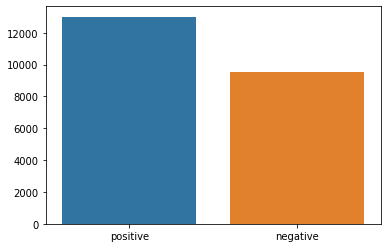

In [21]:
dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['positive','negative']),y=dd.values)
plt.show()

Tokenize dữ liệu: đưa ra tập từ điển, idex của một câu trong tập dữ liệu huấn luyện và tập dữ liệu kiểm tra

In [22]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

In [39]:
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [26]:
def tockenize(x_train,y_train,x_val,y_val):
    word_list = []

    stop_words = stop
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)
  
    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
    
    # tockenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                                    if preprocess_string(word) in onehot_dict.keys()])
            
    # encoded_train = [1 if label =='positive' else 0 for label in y_train]  
    # encoded_test = [1 if label =='positive' else 0 for label in y_val] 
    encoded_train = y_train
    encoded_test = y_val
    return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

In [27]:
x_train,y_train,x_test,y_test,vocab = tockenize(x_train,y_train,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [28]:
print(x_train)
print(y_train)

[list([157, 427, 116, 86, 386, 84, 220, 157, 116, 86, 230, 12, 3, 2])
 list([170, 24, 27, 572, 73, 31, 7, 4, 20, 191, 174, 50, 53, 134, 325, 563, 179, 168, 1, 1])
 list([81, 16, 536, 58, 318, 282, 40, 520, 12, 3, 86, 115, 438, 40, 12, 3, 15, 121, 139, 193, 446, 39, 2, 2])
 ...
 list([7, 4, 20, 513, 28, 665, 4, 497, 497, 190, 195, 558, 314, 188, 54, 124, 122, 64, 150, 134, 77, 671, 252, 118, 422, 72, 134, 325, 563, 16, 96, 13, 4, 88, 84, 1])
 list([12, 3, 66, 31, 116, 120, 89, 41, 99, 212, 43, 7, 89, 41, 86, 89, 67, 114, 87, 107, 113, 15, 121, 139, 66, 153, 423, 114, 12, 12, 3, 189, 1])
 list([7, 18, 374, 94, 4])]
[0 0 1 ... 0 0 0]


## Mã hoá dữ liệu

In [29]:
print(len(x_train))
print("Hiển thị dữ liệu huấn luyện sau khi mã hoá:", x_train[0:5])
print(len(y_train))
y_train
print(vocab)
print("Kích thước của từ điển:",len(vocab))

22521
Hiển thị dữ liệu huấn luyện sau khi mã hoá: [list([157, 427, 116, 86, 386, 84, 220, 157, 116, 86, 230, 12, 3, 2])
 list([170, 24, 27, 572, 73, 31, 7, 4, 20, 191, 174, 50, 53, 134, 325, 563, 179, 168, 1, 1])
 list([81, 16, 536, 58, 318, 282, 40, 520, 12, 3, 86, 115, 438, 40, 12, 3, 15, 121, 139, 193, 446, 39, 2, 2])
 list([263, 803, 46, 321, 71, 14, 31, 63, 500, 63, 803, 972, 131, 573, 334, 487, 49, 343, 352, 487, 803, 134, 574, 630, 295, 174, 487, 122, 18, 487, 803, 14, 105, 505, 209, 192, 283, 11, 10, 102, 38, 94, 582, 91, 487, 172, 209, 192, 2, 2, 2, 2])
 list([38, 16, 36, 90, 655, 527, 91, 439, 4, 14, 191, 140, 19, 22, 11, 10, 6, 118, 13, 4, 79, 74, 6, 2, 2, 1])]
22521
{'positive': 1, 'nagative': 2, 'hang': 3, 'hàng': 4, 'rat': 5, 'rất': 6, 'giao': 7, 'pham': 8, 'san': 9, 'phẩm': 10, 'sản': 11, 'cua': 12, 'cửa': 13, 'không': 14, 'khong': 15, 'mua': 16, 'chat': 17, 'notpos': 18, 'chất': 19, 'nhanh': 20, 'luong': 21, 'lượng': 22, 'dep': 23, 'đẹp': 24, 'co': 25, 'va': 26, 'và': 2

Thống kê độ dài trung bình của một bình luận: 20 từ

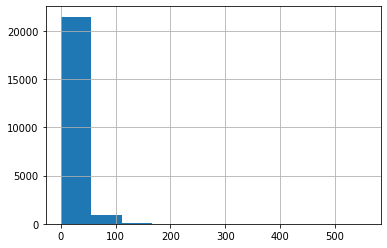

count    22521.000000
mean        20.925758
std         20.516213
min          0.000000
25%          9.000000
50%         16.000000
75%         26.000000
max        556.000000
dtype: float64

In [30]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

Quá trình Padding - chèn từng chuỗi để từng chuỗi có độ dài tối đa

In [31]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [32]:
x_train_pad = padding_(x_train,100)
x_test_pad = padding_(x_test,100)
print(x_train_pad[0:5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0 157 427 116  86
  386  84 220 157 116  86 230  12   3   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 170  24  27 572  73  31   7   4  20 191
  174  50  53 134 325 563 179 168   1   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 

Tải và chuyển dữ liệu dưới dạng Tensor Pytorch

In [33]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)

## Xây dựng mô hình

In [34]:
class SentimentRNN(nn.Module):
  def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5):
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
 
        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
    
        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()
  def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        # print("Embedim_shape:",embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
  def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
no_layers = 2
vocab_size = len(vocab) + 1 #extra 1 for padding

embedding_dim = 64
output_dim = 1
hidden_dim = 256


model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [36]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [37]:
clip = 5
epochs = 10
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device) 
        # print("inputs:", inputs)
        # print("inputs shape:", inputs.shape)
        # print("labels:", labels)
        # print("labels shape:", labels.shape)

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        # print("h:", h)
        # print("h shape:", len(h))
        model.zero_grad()
        output,h = model(inputs,h)
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
        
    
        
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '/content/gdrive/MyDrive/sentiment_vietnamese/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')

Epoch 1
train_loss : 0.3383790370821953 val_loss : 0.309430827594174
train_accuracy : 85.60898716753252 val_accuracy : 86.72951414068166
Validation loss decreased (inf --> 0.309431).  Saving model ...
Epoch 2
train_loss : 0.2719956298172474 val_loss : 0.2716895123760317
train_accuracy : 88.67279428089338 val_accuracy : 88.936082047032
Validation loss decreased (0.309431 --> 0.271690).  Saving model ...
Epoch 3
train_loss : 0.2426095989677641 val_loss : 0.2735724522119359
train_accuracy : 90.24910083921674 val_accuracy : 88.7496115197348
Epoch 4
train_loss : 0.215847339572178 val_loss : 0.2700759333418441
train_accuracy : 91.49238488521824 val_accuracy : 88.90500362581581
Validation loss decreased (0.271690 --> 0.270076).  Saving model ...
Epoch 5
train_loss : 0.18897571999165746 val_loss : 0.2697471851396128
train_accuracy : 92.82891523466986 val_accuracy : 89.19506889050037
Validation loss decreased (0.270076 --> 0.269747).  Saving model ...
Epoch 6
train_loss : 0.1564493812703424 val